In [1]:
%matplotlib inline

# matplotlib

(If you're using the code files, please open matplotlib_lessons.py)

## The importance of communicating your results

So, you've done your preprocessing, and you've doen your analysis. Now, you have to communicate your results. Often, you're going to be communicating with people who aren't programmers. Data visualization is a great way to communicate your analyses in clear, meaningful ways. It also allows you to literally see what's going on in your data. (I should note that data visualization is often a great exploratory step, because again, you get to see what's going on in your data.)

One of the most important parts of visualization is choosing the best plot for your data. A great visualization shouldn't hide the analysis you've made but enhance it. It doesn't have to fancy or complicated, just clear.

## What is matplotlib?

Matplotlib is a 2-dimensional visualization library that is very widely used. You can create a wide variety of plots with it, and you can easily feed in data from other modules in the scientific Python stack, like NumPy, SciPy, scikit-learn, statsmodels, etc. There are a lot of resources online for learning matplotlib, including the matplotlib documentation.

## Why matplotlib?

Matplotlib is, like I mentioned, very widely used. It's very comprehensive, there's a lot of community support for it, and it's in constant development. It is not my personal favorite, but due to its popularity and comprehensiveness, I would be remiss if I didn't talk about it in this tutorial.

## This section

All of the examples I'll show here are fairly simple, uncomplicated examples. After trying out a few different plots, we'll switch back over to our census data and see what we can do with that.

## Plotting

Plotting is really easy in matplotlib. Let's make a scatterplot of our wine data, of the abv and color features.

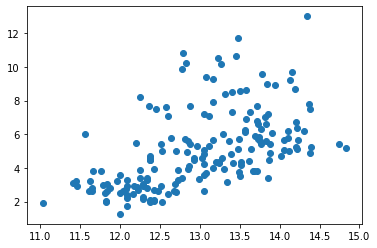

In [2]:
import pandas as pd
import matplotlib.pyplot as plt

wine = pd.read_csv('../data/wine.csv')

# scatterplot of that data

plt.scatter(wine.abv, wine.color)
plt.show()

As you can see, it's very easy to feed data from Pandas into matplotlib.

It's also easy to feed in data from scikit-learn. Let's make a graph of the regression line from the linear regression example. First, we'll create our estimator again.

In [3]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

wine_data_mag = wine.loc[:, ['magnesium']]
wine_data_abv = wine.loc[:, 'abv']

wine_mag_train, wine_mag_test, wine_abv_train, wine_abv_test = train_test_split(wine_data_mag, wine_data_abv)

lr = LinearRegression()
lr.fit(wine_mag_train, wine_abv_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

Then, we'll plot our predicted regression line.

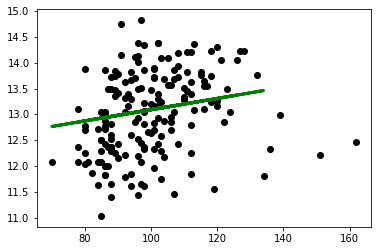

In [4]:
plt.scatter(wine_data_mag.magnesium, wine_data_abv, color='black')
plt.plot(wine_mag_test, lr.predict(wine_mag_test), color='green',
         linewidth=3)
plt.show()

In [5]:
wine_mag_test

,magnesium
166,111
160,88
171,86
6,96
67,78
106,80
163,106
115,85
110,107
1,100


Another easy plot to make is a bar chart. Let's look at the distribution of `wine_types` in the wine `DataFrame`. We're going to get the counts using the `value_counts()` function from Pandas, and then split up the index from those counts.

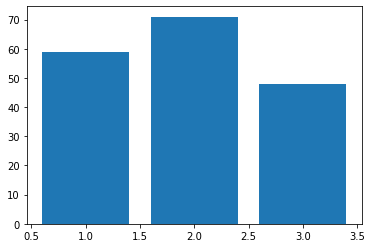

In [6]:
wine_type = wine.loc[:, 'wine_type'].value_counts()
plt.bar(wine_type.index, wine_type.values)
plt.show()

See how the x-axis has numbers in increments of 0.5? That's because the `bar()` function in matplotlib is expecting continuous input. For this situation, there's a much easier way. Pandas actually has plotting functionality of its own. Pandas plotting is a wrapper around matplotlib, so it still uses matplotlib to plot, with some refinements. If we wanted to plot the same chart, it's easier in Pandas:

In [8]:
wine_type

2    71
1    59
3    48
Name: wine_type, dtype: int64

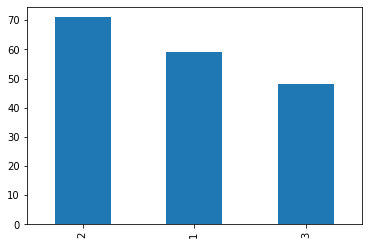

In [7]:
wine_type.plot(kind='bar')

We have a pretty good value distribution.

Making a histogram is also pretty simple. Let's look at the breakdown of abv across the wine dataset. Histograms group data into counts by values, or into bins. With the `hist()` function, you can set the number of bins. The default is 10.

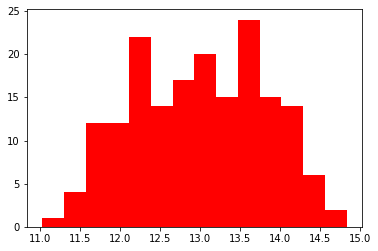

In [9]:
wine_abv = wine.loc[:, 'abv']
plt.hist(wine_abv, bins=14, color='red')
plt.show()

Let's plot the predicted values for wine type against the real values for wine type. First, we'll create our classifier again.

In [10]:
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier

wine_data = pd.read_csv('../data/wine_data.csv')
wine_labels = pd.read_csv('../data/wine_labels.csv', squeeze=True)

wine_data_train, wine_data_test, wine_labels_train, wine_labels_test = train_test_split(wine_data, wine_labels)

knn = KNeighborsClassifier()
knn.fit(wine_data_train, wine_labels_train)
pred = list(knn.predict(wine_data_test))

Now, we'll take the counts of each wine type in each set. We'll also offset the x values for one of the sets, so that we can look at the bars more easily.

<BarContainer object of 3 artists>

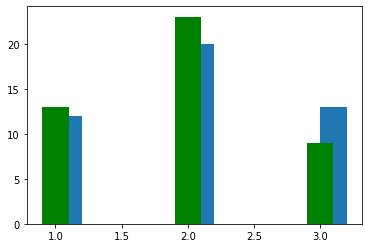

In [11]:
x = [1, 2, 3]
x2 = [1.1, 2.1, 3.1]
y = [pred.count(1), pred.count(2), pred.count(3)]
wine_test = list(wine_labels_test)
y2 = [wine_test.count(1), wine_test.count(2), wine_test.count(3)]

plt.bar(x2, y, width=0.2)
plt.bar(x, y2, width=0.2, color='green', align='center')

Our kNN classifier doesn't look too shabby!

#### Customizing your plots

Let's talk about customizing your plots. matplotlib offers a wide variety of customization, from colors to shapes to line widths to axis labels. We'll go through a few different customizations.

You've already seen that it's easy to change the color, using the 'color' parameter in each of the various plot functions. This parameter takes a string, and that can be a color name like red or blue, or a hex string:

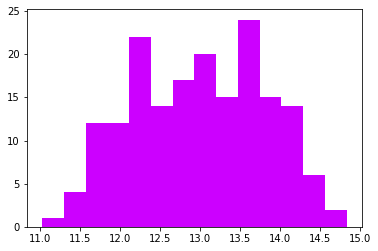

In [12]:
plt.hist(wine_abv, bins=14, color='#CC00FF')
plt.show()

Let's add axis labels.

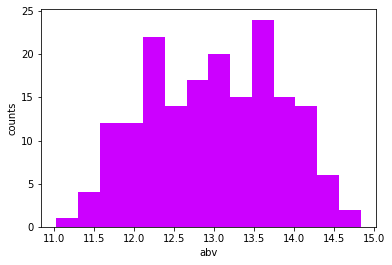

In [13]:
plt.hist(wine_abv, bins=14, color='#CC00FF')
plt.xlabel('abv')
plt.ylabel('counts')
plt.show()

Let's take our regression plot and make it look more interesting.

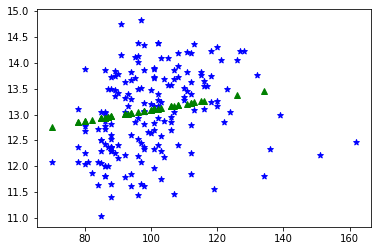

In [14]:
plt.scatter(wine_data_mag.magnesium, wine_data_abv, color='blue', marker='*')
plt.plot(wine_mag_test, lr.predict(wine_mag_test), 'g^',
         linewidth=2)
plt.show()

We now have blue stars for our plot points and green triangles for our regression line. Let's add a legend that tells us that the stars signify our wine data.

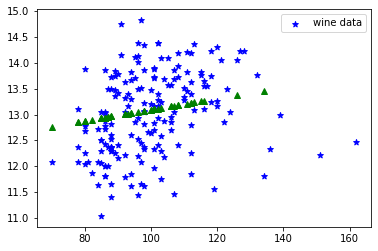

In [15]:
scat = plt.scatter(wine_data_mag.magnesium, wine_data_abv, color='blue', marker='*')
plt.plot(wine_mag_test, lr.predict(wine_mag_test), 'g^',
         linewidth=2)
plt.legend([scat], ['wine data'])
plt.show()

## Lesson: make some plots!

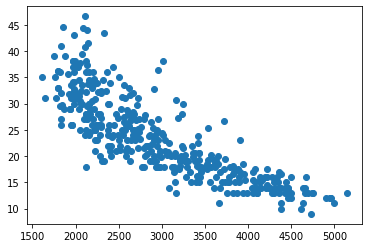

In [16]:
# Using the auto_mpg DataFrame, come up with a scatter plot for weight and mpg.

auto_mpg = pd.read_csv('../data/auto_mpg.txt', delimiter="\t")
plt.scatter(auto_mpg.weight, auto_mpg.mpg)

Text(0, 0.5, 'MPG')

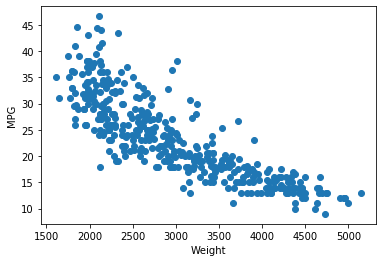

In [18]:
# Can you add weight and mpg axis labels to your plot?

plt.scatter(auto_mpg.weight, auto_mpg.mpg)
plt.xlabel('Weight')
plt.ylabel('MPG')

(array([13., 78., 73., 61., 54., 48., 38., 22.,  5.,  6.]),
 array([ 9.  , 12.76, 16.52, 20.28, 24.04, 27.8 , 31.56, 35.32, 39.08,
        42.84, 46.6 ]),
 <a list of 10 Patch objects>)

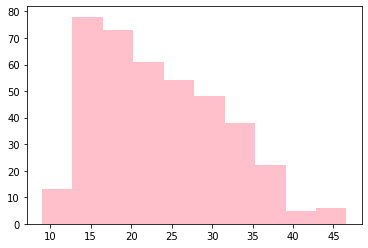

In [20]:
# Can you make a histogram of mpg? Can you change the color to something other than that awful blue?

plt.hist(auto_mpg.mpg,color='pink')


In [ ]:
# Make a plot of anything you want.



# For those using IPython Notebook/Wakari/NBViewer: Go to the [data_analysis](data_analysis.ipynb) notebook!

# For those using code files, go to data_analysis.py!